In [1]:
#importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

### Files download

In [2]:
customers = pd.read_csv (r'C:\Users\erict\Downloads\customers.csv')
products = pd.read_csv (r'C:\Users\erict\Downloads\products.csv')
transactions = pd.read_csv (r'C:\Users\erict\Downloads\transactions.csv')

### Dataframes


In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.shape

(8623, 3)

In [5]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
products.shape

(3287, 3)

In [7]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [8]:
transactions.shape

(679532, 4)

## Data cleanup

### Looking for missing data 

In [9]:
# recherche de valeurs manquantes dans le datafarme customers
print(customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [10]:
# recherche de valeurs manquantes dans le datafarme products
print(products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [11]:
# recherche de valeurs manquantes dans le datafarme transactions
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


### Primary keys tests

In [12]:
def testerCle(df, colonnes):

    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

In [13]:
testerCle(products, ['id_prod'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3287, 3) (lignes, colonnes)


In [14]:
testerCle(transactions,  ['date'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (679532, 4) (lignes, colonnes)


In [15]:
print(transactions[transactions.duplicated(subset=['date'], keep = False)])

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[198 rows x 4 columns]


In [16]:
transactions = transactions[transactions.session_id != 's_0']

In [17]:
testerCle(transactions,  ['date'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (679332, 4) (lignes, colonnes)


In [18]:
testerCle(customers,  ['client_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8623, 3) (lignes, colonnes)


In [19]:
partial_df = pd.merge(products, transactions)
partial_df

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679106,1_140,38.56,1,2022-06-30 11:10:45.544437,s_231391,c_974
679107,0_1920,25.16,0,2023-01-30 02:37:22.371278,s_334324,c_7748
679108,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
679109,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748


In [20]:
profil_client = partial_df.merge(customers, on ='client_id')
profil_client

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679106,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679107,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679108,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679109,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


### Dans un premier temps, je vais avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires. Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ?

In [21]:
# creation d'un colonne année
profil_client['date'] = profil_client['date'].astype('str')
profil_client['year'] = profil_client['date'].str[:4]
profil_client['year'] = profil_client['year'].astype('int32')
# creation d'un colonne mois
profil_client['month']= profil_client['date'].str[5:7]
profil_client['month']= profil_client['month'].astype('int32')


In [22]:
chiffre_affaires = profil_client.groupby(['year','month']).sum()
chiffre_affaires['price']

year  month
2021  3        482440.61
      4        476109.30
      5        492943.47
      6        484088.56
      7        482835.40
      8        482284.79
      9        507240.68
      10       320798.74
      11       516167.73
      12       525917.28
2022  1        525338.99
      2        535571.50
      3        515456.53
      4        492998.94
      5        517132.60
      6        496016.12
      7        510783.12
      8        506467.27
      9        494114.53
      10       507917.77
      11       496664.94
      12       510219.50
2023  1        517540.55
      2        456679.76
Name: price, dtype: float64

In [23]:
resultat = chiffre_affaires.price.sum()
print('le chiffre d\'affaires total sur la periode donnée est de {} euros'.format(resultat))

le chiffre d'affaires total sur la periode donnée est de 11853728.68 euros


In [24]:
chiffre_affaires.price.describe().round(2)

count        24.00
mean     493905.36
std       41208.74
min      320798.74
25%      483775.27
50%      501566.10
75%      515634.33
max      535571.50
Name: price, dtype: float64

<AxesSubplot:xlabel='year,month'>

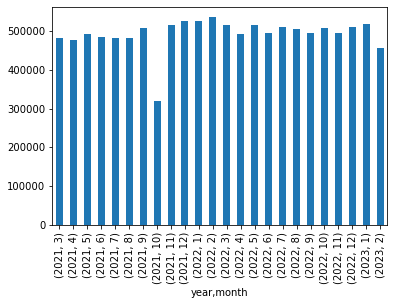

In [25]:
chiffre_affaires['price'].plot.bar()

Text(0, 0.5, "Chiffre d'affaires en euros")

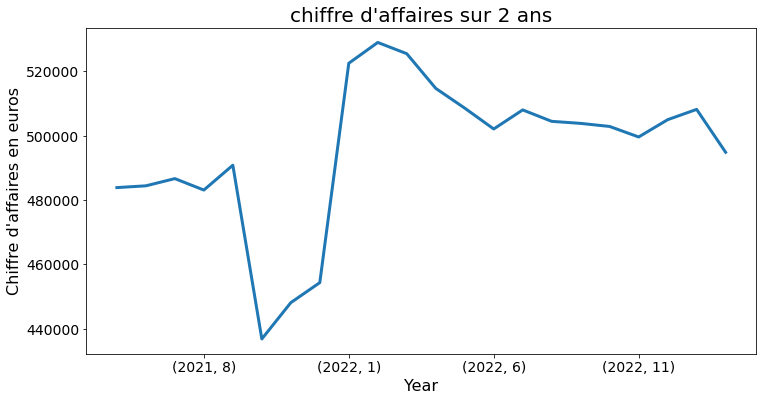

In [26]:
chiffre_affaires['MMS']=chiffre_affaires['price'].rolling(3).mean()

chiffre_affaires['MMS'].plot(linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('chiffre d\'affaires sur 2 ans', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Chiffre d\'affaires en euros', fontsize=16)

### Il serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie

In [27]:
# les 20 références produits les plus vendues
profil_client['id_prod'].value_counts().head(20)

1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
1_396    1921
1_398    1917
1_395    1875
1_400    1839
1_392    1825
1_376    1809
1_397    1799
1_385    1798
1_388    1792
1_381    1781
Name: id_prod, dtype: int64

In [28]:
# les 20 références produits les moins vendues
profil_client['id_prod'].value_counts().tail(20)

0_2257    2
1_420     2
0_886     1
2_23      1
2_81      1
0_541     1
0_1379    1
0_1601    1
0_1683    1
0_1728    1
0_1498    1
0_549     1
0_1633    1
0_1539    1
0_2201    1
0_833     1
0_807     1
0_1284    1
0_1151    1
2_98      1
Name: id_prod, dtype: int64

In [29]:
# les 20 références ayant générées le plus de chiffres d'affaires
profil_client.groupby(['id_prod'])['price'].sum().sort_values(ascending = False).head(20)

id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12
1_414    51949.40
1_383    51486.24
2_43     49972.86
1_498    49731.36
1_406    48106.59
1_366    47005.38
1_385    46730.02
1_431    46575.36
2_202    46217.88
1_379    46098.92
Name: price, dtype: float64

In [30]:
# les 20 références ayant générées le moins de chiffres d'affaires
profil_client.groupby(['id_prod'])['price'].sum().sort_values(ascending = False).tail(20)

id_prod
0_902     3.68
0_324     3.54
0_1683    2.99
0_549     2.99
0_1379    2.99
0_1151    2.99
0_833     2.99
0_1191    2.97
0_643     2.97
0_1759    2.97
0_1840    2.56
0_898     2.54
0_1498    2.48
0_1728    2.27
0_541     1.99
0_1601    1.99
0_807     1.99
0_1653    1.98
0_1284    1.38
0_1539    0.99
Name: price, dtype: float64

<AxesSubplot:title={'center':'répartition par catégories'}, ylabel='price'>

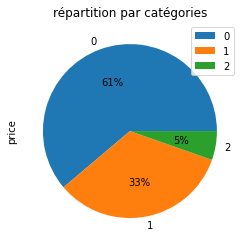

In [31]:
profil_client.groupby('categ').count().plot(kind='pie',y='price', autopct='%1.0f%%', title = 'répartition par catégories')

### Enfin, j’aimerais avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

<AxesSubplot:title={'center':'répartition par sexe'}, ylabel='birth'>

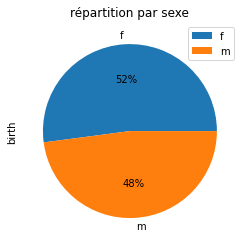

In [32]:
customers.groupby('sex').count().plot(kind='pie',y='birth', autopct='%1.0f%%', title = 'répartition par sexe')

<AxesSubplot:ylabel='Frequency'>

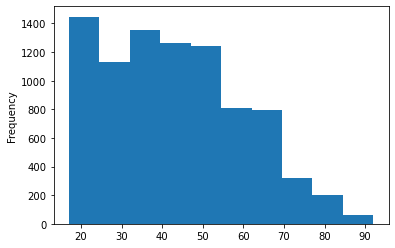

In [33]:
customers['age'] = 2021 - customers.birth
customers['age'].plot(kind='hist')

In [34]:
customers['age'].describe().round()

count    8623.0
mean       43.0
std        17.0
min        17.0
25%        29.0
50%        42.0
75%        55.0
max        92.0
Name: age, dtype: float64

In [35]:
customers['age'].skew()
# right-skewed distribution, unimodal

0.36100192847210094

In [36]:
# chiffres d'affaires femmes/hommes
profil_client.groupby('sex')['price'].sum()

sex
f    5859683.13
m    5994045.55
Name: price, dtype: float64

In [37]:
# nombres d'achats femmes/hommes
profil_client.groupby('sex')['price'].count()

sex
f    338285
m    340826
Name: price, dtype: int64

In [38]:
# panier moyen femmes/hommes
profil_client.groupby('sex')['price'].mean()

sex
f    17.321735
m    17.586820
Name: price, dtype: float64

0.4463865413740149


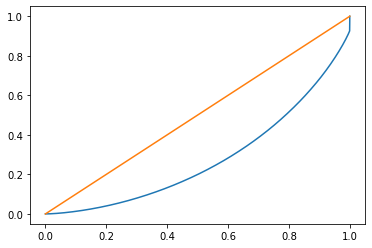

In [39]:
# la courbe de lorenz est utilisée pour charactériser la concentration du chiffre d'affaires dans notre population de clients
# axe des x = % cumulé du nombre de clients
# axe des y = % cumulé du chiffre d'affaires 

lorenz_curve_data = profil_client.groupby('client_id').sum()
lorenz_curve_data.sort_values(by=['price'], inplace=True)
pc = lorenz_curve_data['price'].tolist()

arr = np.array(pc)

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scaled_prefix_sum, 0, 0)

print(gini(arr))

lorenz_curve = lorenz(arr)

plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
plt.plot([0,1], [0,1])
plt.show()


### J’aimerais que tu regardes en particulier : le lien entre le genre d’un client et les catégories des livres achetés 

In [40]:
#analyse bivariée entre deux variables qualitatives (tableau de contingence / chi-2)
X = 'sex'
Y = 'categ'

contigency_df = profil_client[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contigency_df

categ,0,1,2,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


In [41]:
contigency_pct = pd.crosstab(profil_client['sex'], profil_client['categ'], normalize='index')
contigency_pct

categ,0,1,2
sex,,,
f,0.609258,0.339651,0.051090
m,0.614261,0.329406,0.056334


In [42]:
# Chi-square test of independence 
c, p, dof, expected = chi2_contingency(contigency_df) 
# p-value
print(p)

3.144522803251581e-29


In [43]:
#la p-value sous permet de rejeter l'hypothèse null avec un niveau de confidence de 99%
#L'hypothèse null était que le sexe et la gatégorie/produit sont independant

### le lien entre l’âge des clients et le montant total des achats

<AxesSubplot:xlabel='age', ylabel='price'>

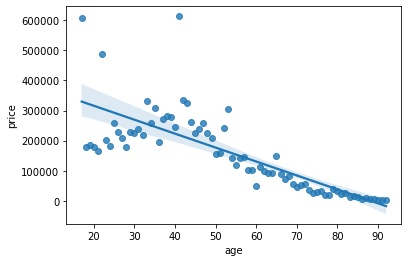

In [44]:
#analyse bivariée entre deux variables quantitatives (scatter plot + régression lineaire)
profil_client['age'] = 2021 - profil_client.birth
question_un = profil_client.groupby(['age']).sum()
question_un['age'] = question_un.index
sns.regplot(x= 'age', y= 'price', data = question_un  )

In [45]:
#coefficient de correlation linéaire
question_un[['age','price']].corr()

,age,price
age,1.000000,-0.778881
price,-0.778881,1.000000


###  la fréquence d’achat

<AxesSubplot:xlabel='age', ylabel='price'>

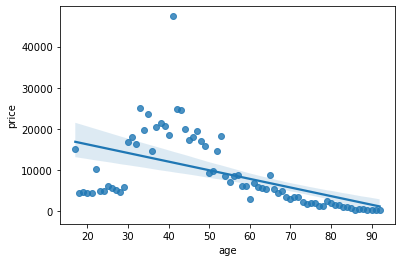

In [46]:
#analyse bivariée entre deux variables quantitatives (scatter plot + régression lineaire)
question_deux = profil_client.groupby(['age']).count()
question_deux['age'] = question_deux.index
sns.regplot(x= 'age', y= 'price', data = question_deux )

In [47]:
#coefficient de correlation linéaire
question_deux[['age','price']].corr()

,age,price
age,1.000000,-0.533734
price,-0.533734,1.000000


### la taille du panier moyen 

<AxesSubplot:xlabel='age', ylabel='price'>

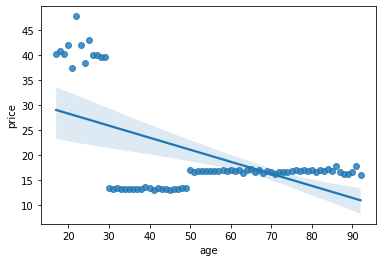

In [48]:
#analyse bivariée entre deux variables quantitatives (scatter plot + régression lineaire)
question_trois = profil_client.groupby(['age']).mean()
question_trois['age'] = question_trois.index
sns.regplot(x= 'age', y= 'price', data = question_trois )

### les catégories des livres achetés

<AxesSubplot:xlabel='categ', ylabel='age'>

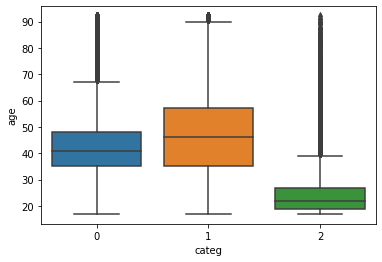

In [49]:
#analyse bivariée entre une variable qualitative et une variable quantitative (boxplot + Anova)
sns.boxplot(x='categ', y='age', data= profil_client)

In [50]:
#L'ANOVA est une modélisation qui essaie d'expliquer les variations de la variable quantitative en fonction des modalités de la variable qualitative.
#Elle permet de calculer le rapport de corrélation, noté η2 utile pour évaluer numériquement la corrélation
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(profil_client[X],profil_client[Y])

0.11903391947231187